# Riley

# EDA of Data
## load in data and necassairy classes

In [1]:
# imports 
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from project_functions1 import pipeline

# read in data format columns
df = pd.read_csv("../data/raw/adult.data")
df.columns =['age', 'workclass','fnlwgt', 'education','education-num','marital-status','occupation', 'relationship', 
                     'race','sex', 'capital-gain', 'capital-loss' ,  'hours-per-week','native-country', 'salary'] 
df['salary'] = pd.factorize(df['salary'])[0]

## first I want to see the distrubution of people who make over and under 50k

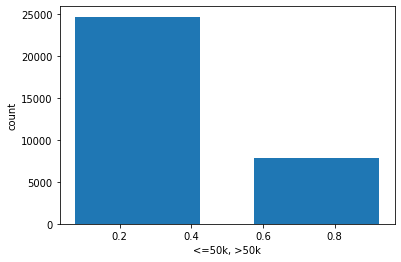

(<=50k, =>50k) ([24720.  7841.])
 the percentage of people who make under 50k in this dataset is: 75.91904425539757%
 the percentage of people who make over 50k in this dataset is: 24.080955744602434%


In [2]:

(n, bins, patches) = plt.hist(df['salary'], bins=2, rwidth=.7)

# add plot labels
plt.xlabel('<=50k, >50k')
plt.ylabel('count')
plt.show()

print(f"(<=50k, =>50k) ({n})")

print(f" the percentage of people who make under 50k in this dataset is: {n[0]/sum(n) * 100}%")
print(f" the percentage of people who make over 50k in this dataset is: {100 -n[0]/sum(n) * 100}%" )

# next let's see the pairwise plot to see if there is any correlations between data

#### we will also highlight salary to see if there is large differences between groups making more or less than 50k

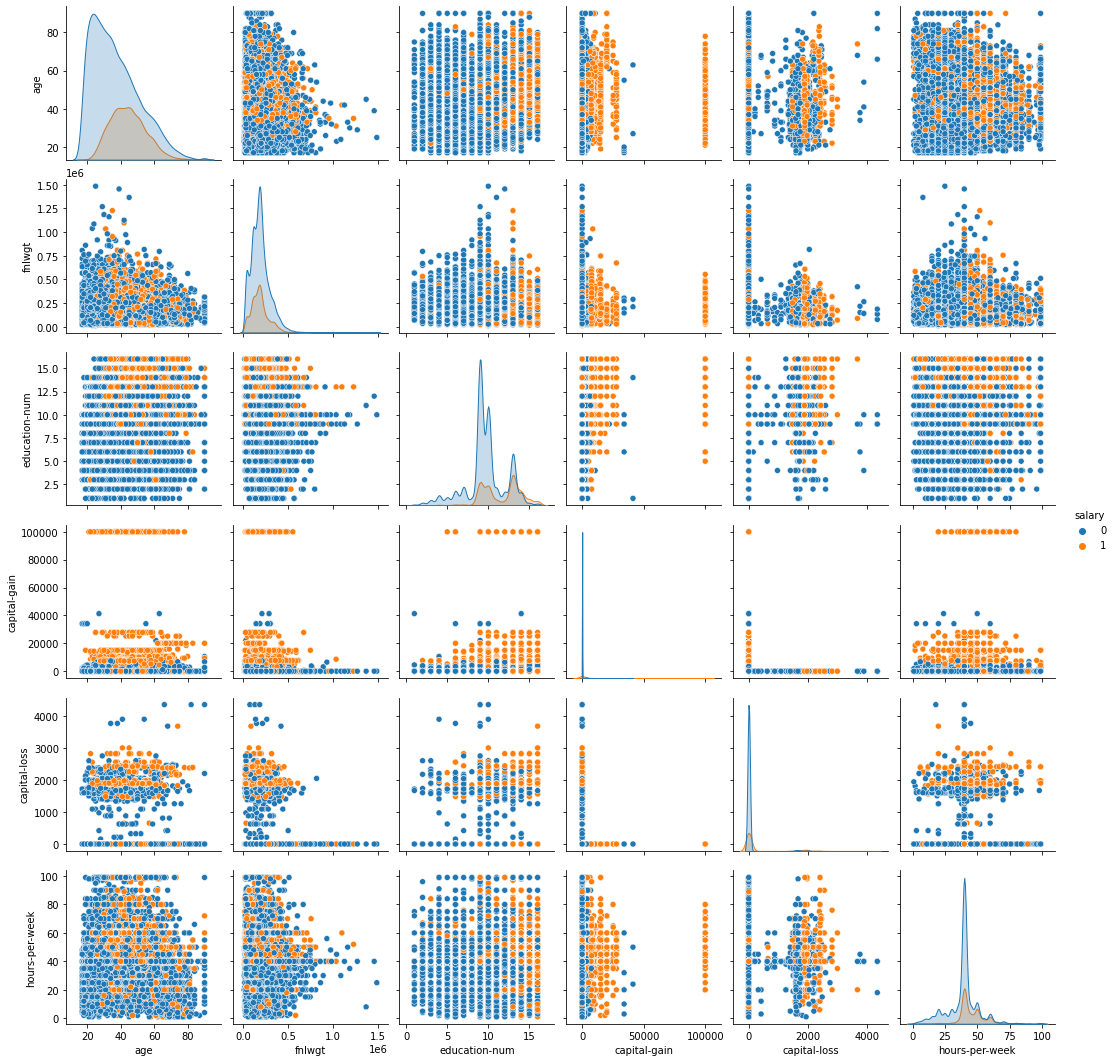

In [3]:
sns.pairplot(df, hue="salary")

#### some of this data is quite confusing due to the fact that there are alot of categorical variables in this data set.

#### there are a couple relationships which can be noticed here such ass capitial gain apears to be larger for those with higher education.

#### another relationship older people tend to work slightly less then younger adults

#### capital gain does not appear to have a relationship with the hours worked per week

# Next we will look at the number of men and women in the dataset

The number of males in the data is: 0 
The number of females in the data is: 0 


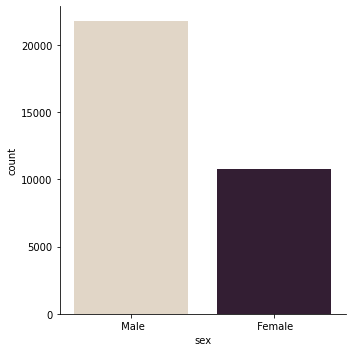

In [4]:
sex_plot = sns.catplot(x="sex", kind="count", palette="ch:.25", data=df)

print(f"The number of males in the data is: {df[df['sex']==0].shape[0]} ")
print(f"The number of females in the data is: {df[df['sex']==1].shape[0]} ")
 

#### as we can see 2/3 of this data is of males.
#### This means this data is skewed towards males. considering the true populations of males and females floats around 50%

# Task 2: pipeline

#### 1) read in data 

In [5]:
df = pd.read_csv("../data/raw/adult.data")

#### dataframe before pipline

In [6]:
df

,age,education-num,marital-status,relationship,sex,workclass,capital-gain,capital-loss,native-country,age,education,fnlwgt,hours-per-week,occupation,race
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### 2) data cleaning replace column names with correct column names

In [7]:
df.columns =['age', 'workclass','fnlwgt', 'education','education-num','marital-status','occupation', 'relationship', 
                     'race','sex', 'capital-gain', 'capital-loss' ,  'hours-per-week','native-country', 'salary'] 

#### 3) remove columns with na

In [8]:
df = df.dropna()

#### 4) remove columns which willed not be used in analysis

In [9]:
del df["fnlwgt"]
del df["age"]
del df["education"]
del df["education-num"]
del df["relationship"]
del df["capital-gain"]
del df["capital-loss"]
del df["hours-per-week"]
del df["native-country"]
del df["workclass"]
del df["marital-status"]


#### 6) change salary from (<=50,>50k) => (0,1)

In [10]:
df['salary'] = pd.factorize(df['salary'])[0]

#### 7) change sex to binary (female, male) => (1,0)

In [11]:
df['sex'] = pd.factorize(df['sex'])[0]

#### Result of pipeline

In [12]:
df

,occupation,race,sex,salary
0,Adm-clerical,White,0,0
1,Exec-managerial,White,0,0
2,Handlers-cleaners,White,0,0
3,Handlers-cleaners,Black,0,0
4,Prof-specialty,Black,1,0
...,...,...,...,...
32556,Tech-support,White,1,0
32557,Machine-op-inspct,White,0,1
32558,Adm-clerical,White,1,0
32559,Adm-clerical,White,0,0


#### this pipeline has been refactored and placed into project_functions1.py

# Task 4: Analysis

## what combination of sex, race, and occupation has the highest percentage of people making over 50k.

The purpose of this question is to see if in this dataset there is a bias towards making over 50k for a particular group

In [13]:
#imports 
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from project_functions1 import pipeline

df = pipeline.load_data()

make groups for all combinations of sex race and occupation

In [14]:
# group by sex, race and occupation

split = df.groupby(['occupation', 'sex', 'race'])


Here we are making a new data frame called final_df which will contain the number of people in each group making over and under 50k and the percentage of people in the group making over 50k 

In [15]:
final_df = pd.DataFrame( columns=[ 'occupation-race-sex', 'number-of-people-over-50k', 'number-of-people-under-50k', 'percentage'])
##df.loc[len(df.index)] = [value1, value2, value3, ...]
for (name, group) in split:
    over = group[group['salary'] == 1].shape[0]
    under = group[group['salary'] == 0].shape[0]
    percentage = (over/group['salary'].shape[0])*100
    final_df.loc[len(final_df.index)] = [name, over, under, percentage]


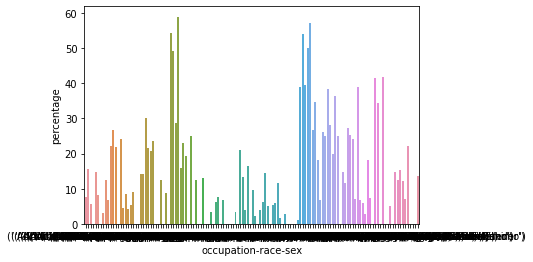

In [16]:

ax = sns.barplot(x="occupation-race-sex", y="percentage", data=final_df)


#### here we can see there is a large spread in percentages of groups making over 50k 

Now we find the group which makes has the highest percentage of making over 50k

In [17]:
final_df[final_df['percentage'] == final_df['percentage'].max()]



,occupation-race-sex,number-of-people-over-50k,number-of-people-under-50k,percentage
37,"( Exec-managerial, 0, White)",1573,1096,58.935931


From this we can see the group which has the highest amount of people making 50k in this dataset it is executive managers, who are male and white. Where 58.94 percent make over 50k a year.